<a href="https://colab.research.google.com/github/MDA1422/BIDM_Tasks/blob/main/BIDM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, HTML
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


Mounted at /content/drive



# **Task 1 Exploratory Data Analysis**

**1.1 Data Analysis**

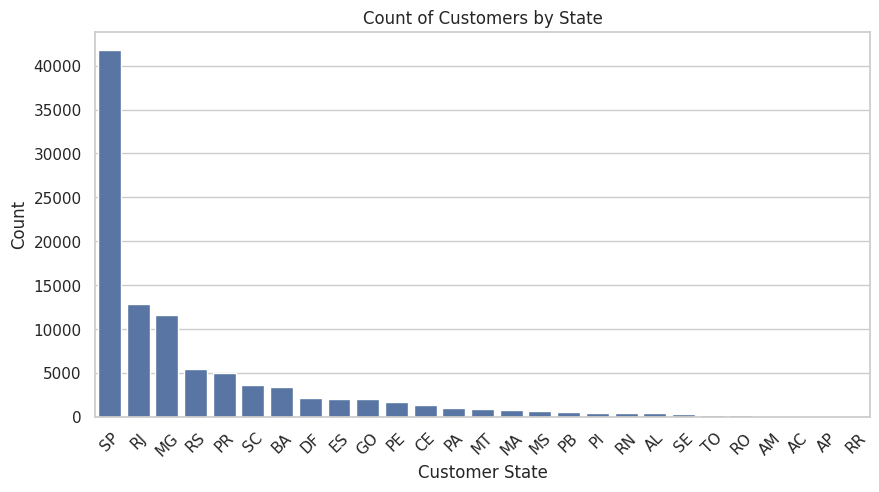

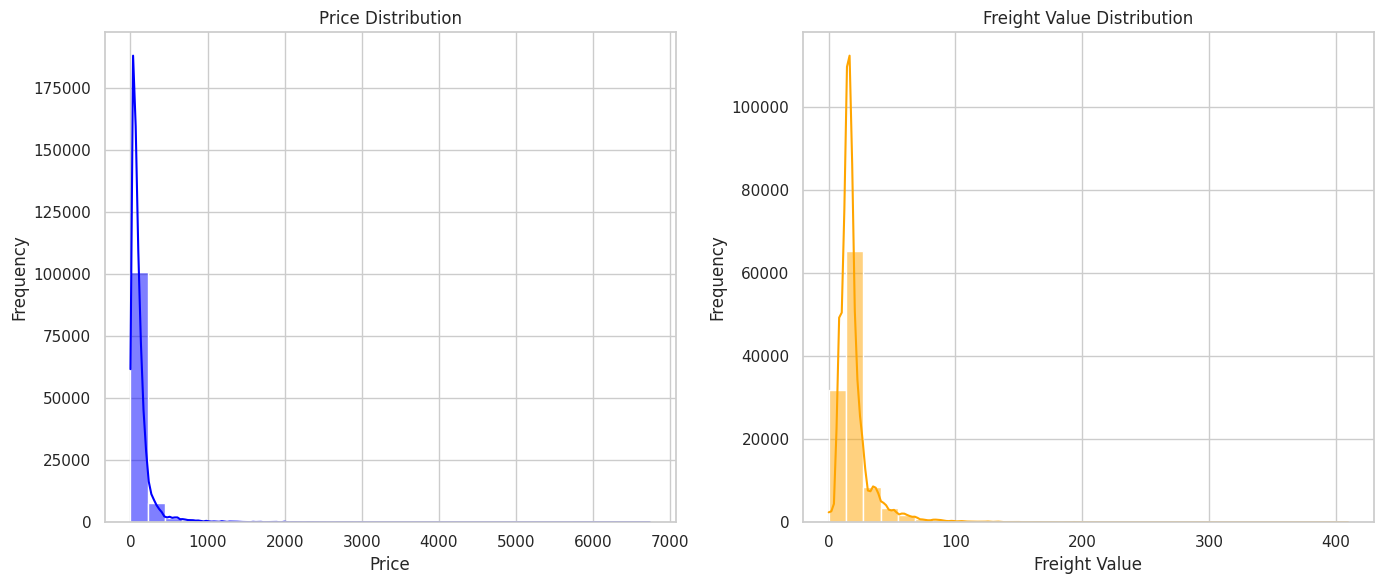

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Plotting based on the dataset - INDENTED INSIDE THE LOOP
        if filename == 'olist_customers_dataset.csv':
            # Bar chart for customer count by state
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
            plt.title('Count of Customers by State')
            plt.xlabel('Customer State')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_geolocation_dataset.csv':

            state_counts = dataframes[filename]['geolocation_state'].value_counts().reset_index()
            state_counts.columns = ['state', 'count']

            # URL to a GeoJSON file for Brazilian states
            brazil_geojson_url = (
                "https://raw.githubusercontent.com/codeforamerica/click_that_hood/"
                "master/public/data/brazil-states.geojson"
            )

            # Create the Choropleth Map
            fig = px.choropleth(
                state_counts,
                geojson=brazil_geojson_url,
                locations='state',  # State abbreviations (e.g., "SP")
                featureidkey='properties.sigla',  # Key in GeoJSON matching state abbreviations
                color='count',  # Values to color
                color_continuous_scale='Blues',
                scope='south america',  # Focus on Brazil
                labels={'count': 'Number of Zip Codes'},
                title='Geolocation Density by Brazilian State'
            )

            # Adjust map layout
            fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
            fig.update_layout(margin={"r":0, "t":40, "l":0, "b":0})
            fig.show()

        elif filename == 'olist_order_items_dataset.csv':
            # Box plot for price distribution
            # plt.figure(figsize=(10, 5))
            # sns.boxplot(x=df['price'])
            # plt.title('Box Plot of Prices')
            # plt.xlabel('Price')
            # plt.grid()
            # plt.show()

            sns.set(style="whitegrid")
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            # Histogram for Price
            sns.histplot(dataframes[filename]['price'], bins=30, kde=True, ax=axes[0], color='blue')
            axes[0].set_title('Price Distribution')
            axes[0].set_xlabel('Price')
            axes[0].set_ylabel('Frequency')
            # Histogram for Freight Value
            sns.histplot(dataframes[filename]['freight_value'], bins=30, kde=True, ax=axes[1], color='orange')
            axes[1].set_title('Freight Value Distribution')
            axes[1].set_xlabel('Freight Value')
            axes[1].set_ylabel('Frequency')

            plt.tight_layout()
            plt.show()


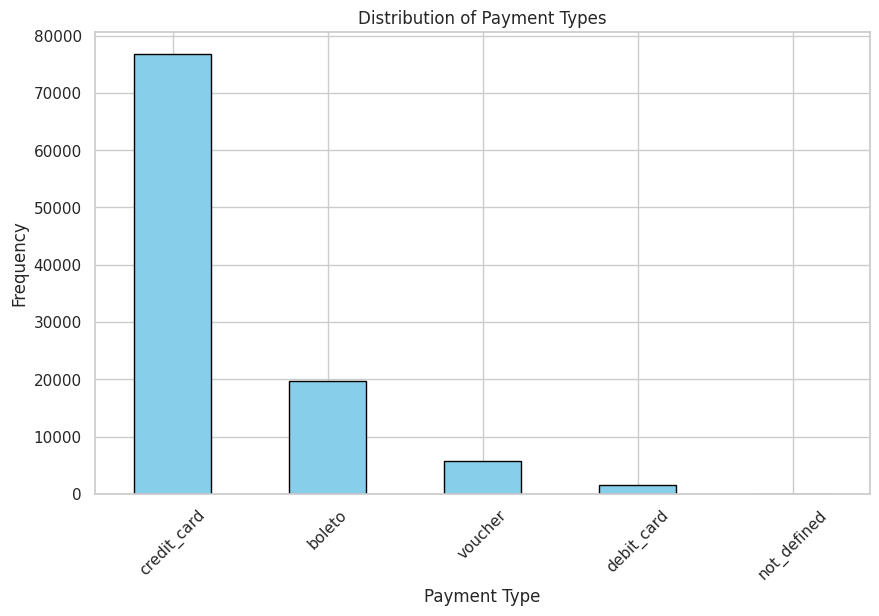

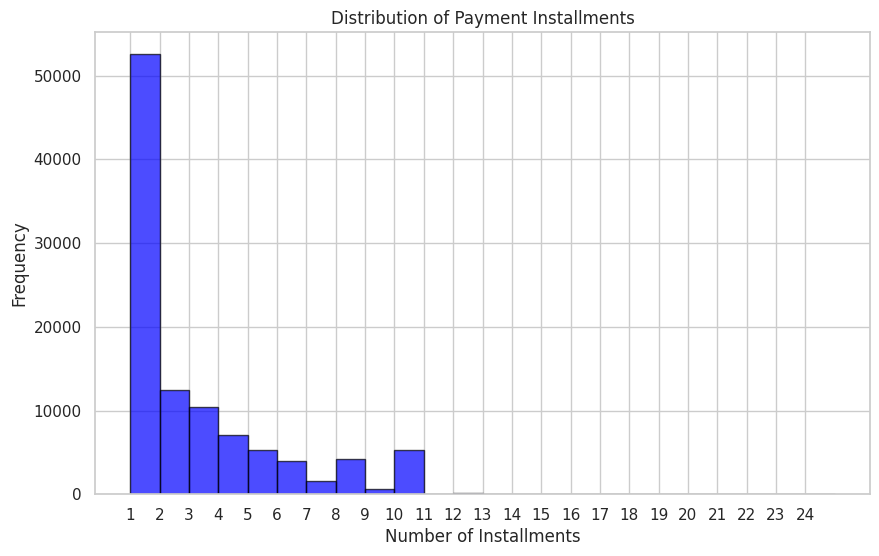

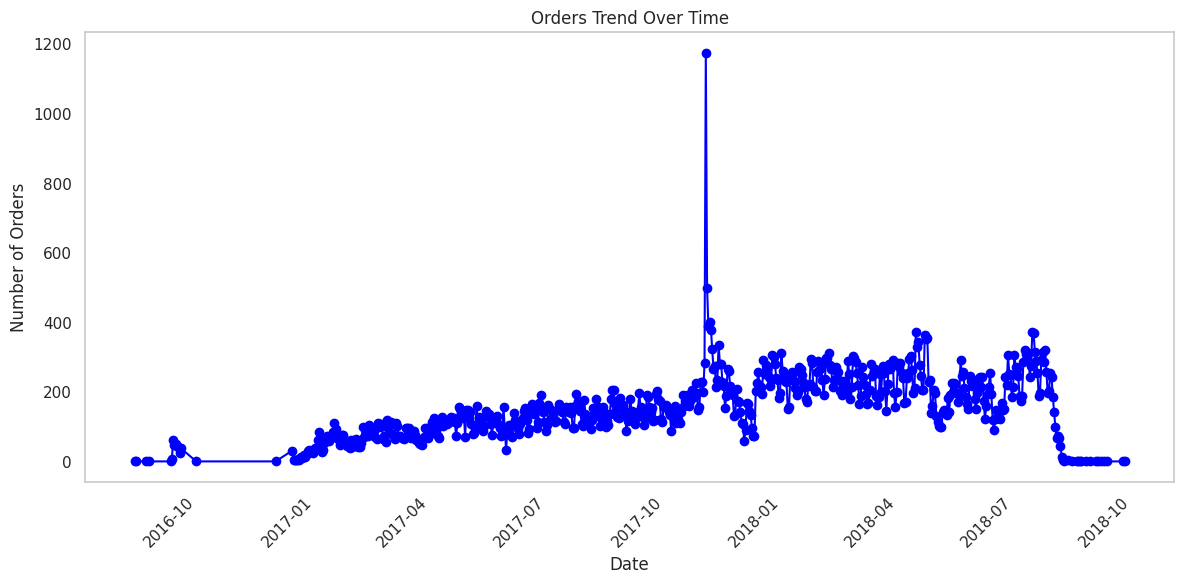

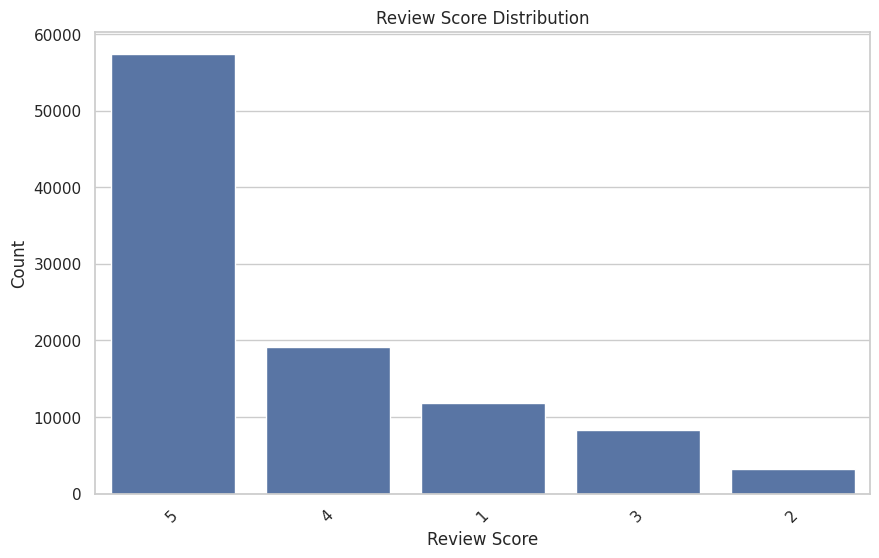

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_orders_dataset.csv':
            dataframes[filename]['order_purchase_timestamp'] = pd.to_datetime(dataframes[filename]['order_purchase_timestamp'])

            # Group by date and count the number of orders
            orders_trend = dataframes[filename].groupby(dataframes[filename]['order_purchase_timestamp'].dt.date).size()

            # Create a line chart
            plt.figure(figsize=(12, 6))
            plt.plot(orders_trend.index, orders_trend.values, marker='o', linestyle='-', color='blue')
            plt.title('Orders Trend Over Time')
            plt.xlabel('Date')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
            plt.show()

        elif filename == 'olist_order_reviews_dataset.csv':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=dataframes[filename], x='review_score', order=dataframes[filename]['review_score'].value_counts().index)
            plt.title('Review Score Distribution')
            plt.xlabel('Review Score')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_order_payments_dataset.csv':

            # distribution of payment types
            payment_type_counts = dataframes[filename]['payment_type'].value_counts()
            plt.figure(figsize=(10, 6))
            payment_type_counts.plot.bar(color='skyblue', edgecolor='black')
            plt.title('Distribution of Payment Types')
            plt.xlabel('Payment Type')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()


           # distribution of payment installments
            plt.figure(figsize=(10, 6))
            plt.hist(dataframes[filename]['payment_installments'], bins=range(1, dataframes[filename]['payment_installments'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
            plt.title('Distribution of Payment Installments')
            plt.xlabel('Number of Installments')
            plt.ylabel('Frequency')
            plt.xticks(range(1, dataframes[filename]['payment_installments'].max() + 1))
            plt.show()


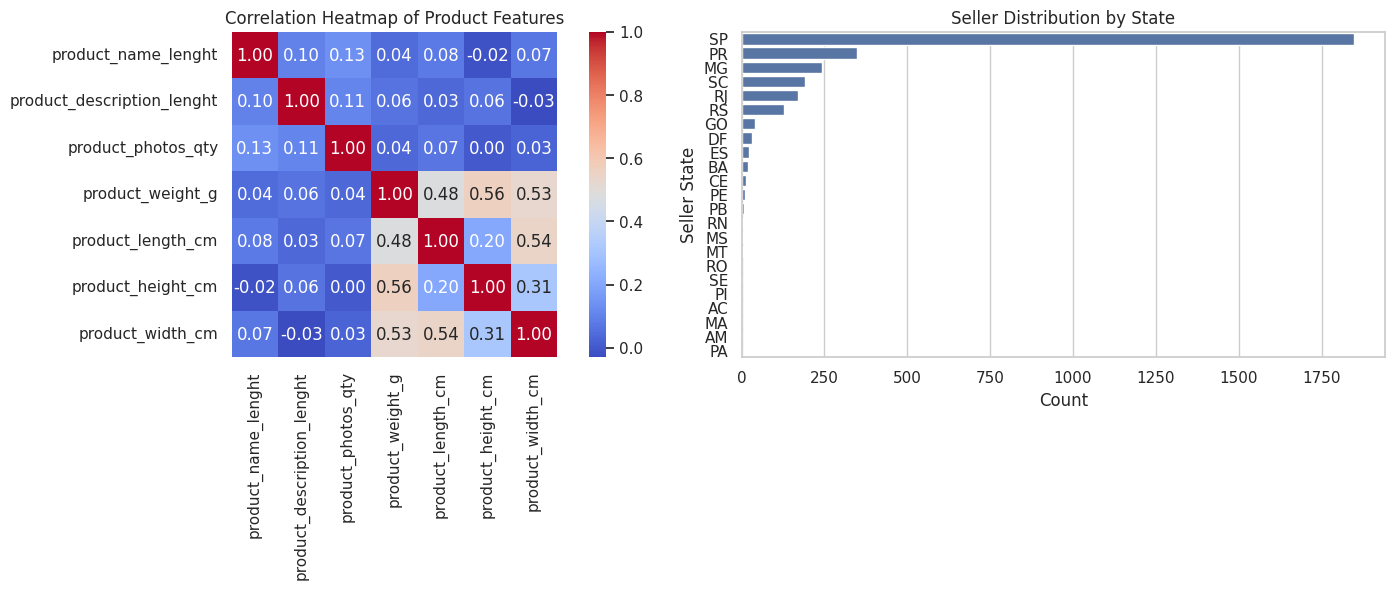

In [ ]:

dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)
        df = pd.read_csv(file_path, encoding='latin-1')
        dataframes[filename] = df

        if filename == 'olist_products_dataset.csv':
          numerical_df = dataframes[filename].select_dtypes(include=['number'])
          correlation_matrix = numerical_df.corr()

        elif filename == 'olist_sellers_dataset.csv':
          pass  # Placeholder for the second chart data

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Product Features')

# Plot the seller distribution on the second subplot (axes[1])
sns.countplot(data=dataframes['olist_sellers_dataset.csv'], y='seller_state',
              order=dataframes['olist_sellers_dataset.csv']['seller_state'].value_counts().index,
              ax=axes[1])
axes[1].set_title('Seller Distribution by State')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Seller State')

# Adjust layout and display the plots
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

**1.2  Summary of the data and Missing Values**

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'


def remove_outliers_iqr(df, numerical_cols):
          for col in numerical_cols:
              Q1 = df[col].quantile(0.25)
              Q3 = df[col].quantile(0.75)
              IQR = Q3 - Q1
              lower_bound = Q1 - 1.5 * IQR
              upper_bound = Q3 + 1.5 * IQR

              # Remove outliers
              initial_shape = df.shape
              df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
              if df.shape != initial_shape:
                  print(f'Removed outliers from {col} using IQR method in {filename}.')

          return df

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame, specifying the encoding
        # Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Check for missing values
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f'{filename} has {missing_values} missing values.')
        else:
            print(f'{filename} has no missing values.')

        # Summarize the data
        print(f'\nSummary of {filename}:')
        print(df.describe(include='all'))

        # Check for timestamp data type and convert if necessary
        for col in df.columns:
            if 'date' in col.lower() or 'time' in col.lower():
                try:
                    df[col] = pd.to_datetime(df[col])
                    print(f'Converted {col} to datetime in {filename}.')
                except Exception as e:
                    print(f'Failed to convert {col} in {filename}. Error: {e}')

        # Check for categorical data
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        if categorical_cols:
            print(f'Categorical columns in {filename}: {categorical_cols}')

        # Plotting distribution of numerical features
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


        # Check if feature scaling is needed
        if numerical_cols:
            for col in numerical_cols:
                min_val = df[col].min()
                max_val = df[col].max()
                print(f'{col} in {filename} has min: {min_val}, max: {max_val}')

        # Additional pre-processing steps
        # Dropping duplicates
        initial_shape = df.shape
        df.drop_duplicates(inplace=True)
        if df.shape != initial_shape:
            print(f'Dropped duplicates in {filename}.')

        # Checking for noise (e.g., negative values where not expected)
        for col in numerical_cols:
            if (df[col] < 0).any():
                print(f'Noise detected: Negative values in {col} of {filename}.')


        for filename, df in dataframes.items():
            numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
            df = remove_outliers_iqr(df, numerical_cols)
            dataframes[filename] = df


olist_customers_dataset.csv has no missing values.

Summary of olist_customers_dataset.csv:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN          

<ipython-input-27-a9c92724e0f8>:48: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-27-a9c92724e0f8>:48: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Converted review_answer_timestamp to datetime in olist_order_reviews_dataset.csv.
Categorical columns in olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']
review_score in olist_order_reviews_dataset.csv has min: 1, max: 5
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from review_score using IQR method in olist_order_reviews_dataset.csv.


**1.3 Timestamp Data**

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'
dataframes = {}
for filename in os.listdir(datasets_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(datasets_path, filename)
    df = pd.read_csv(file_path, encoding='latin-1')
    dataframes[filename] = df


for filename, df in dataframes.items():
       for column in df.columns:
           if 'timestamp' in column.lower():
               # Apply HTML styling for blue text
               display(HTML(f"<span style='color:blue;'>{filename}: {column}</span>"))

# Task 2 Customer Segmentation

**Segment 1 - Least Satisified Customers**

To derive this segment, we derived the percentage of frequency that each score 1 - 5 has in the 'review' column. After score 5, the amount of scores with 1s or 2s make up the 2nd and 3rd most amounts of scores with 19% and 11%  highlighting a significant amount of dissatisfied customers.

Based on these customers, we should proactively address their satisfaction levels by implementing retention strategies, such as offering small discounts or exclusive perks. This will help enhance their loyalty and reduce the likelihood of them switching to a competitor.

Among the dissatisfied, we have identified the recurring customers who still frequently buy the products represented in the variable 'low_r_customer_ids', they should be given more discounts than the others because they make up the segment of loyal customers too and if it’s not in the budget only them should be offered the discounts.

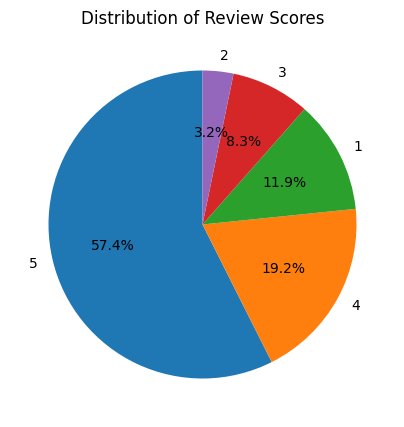

In [88]:


datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_order_reviews_dataset.csv']
df2 = dataframes['olist_orders_dataset.csv']
df3 = df1['review_score']
df4 = df2['order_id']

# Calculate the counts of each review score
score_counts = df1['review_score'].value_counts()

# Calculate the percentages of each score
score_percentages = (score_counts / score_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(score_percentages, labels=score_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review Scores')
plt.show()
# Extract the order_id from the filtered DataFrame
low_rating_order_ids = filtered_df1['order_id'].tolist()

# Merge filtered_df1 with df2 to get customer_id
low_r_customer = pd.merge(filtered_df1[['order_id']], df2[['order_id', 'customer_id']], on='order_id', how='left')

# Get the unique customer IDs
low_r_customer_ids = low_r_customer['customer_id'].unique().tolist()


**Segment 2 - Best Sellers**

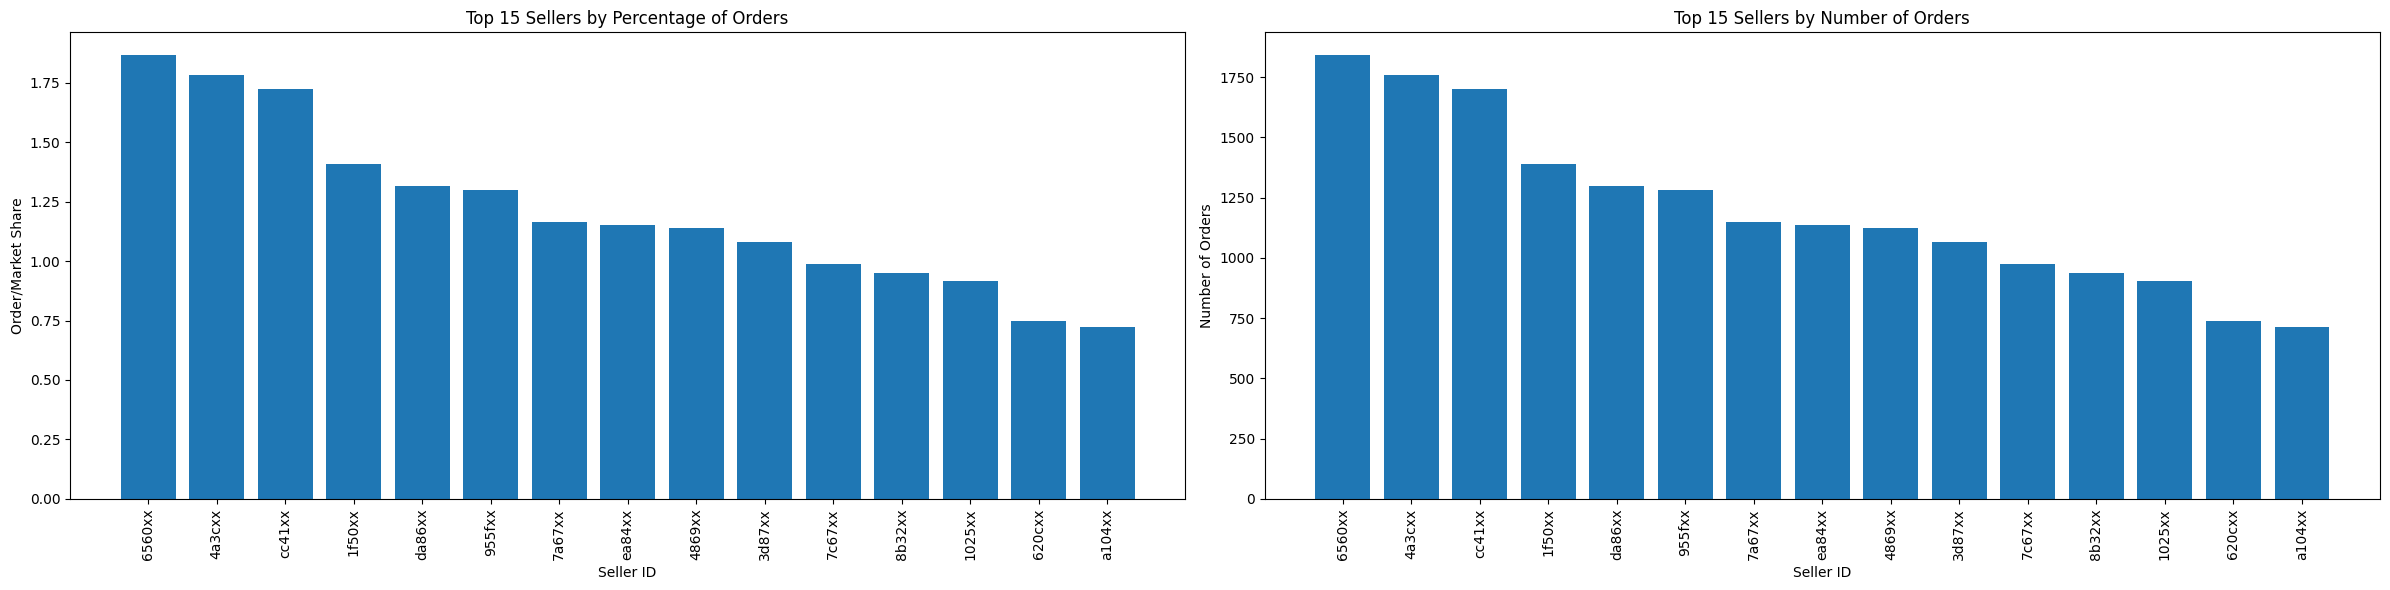

In [69]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_orders_dataset.csv']
order_items = dataframes['olist_order_items_dataset.csv']

unique_orders = order_items.drop_duplicates(subset=['order_id'])
seller_order_counts = unique_orders['seller_id'].value_counts()
c = seller_order_counts.head(15)

total_orders = seller_order_counts.sum()
top_15_percentages = (c / total_orders) * 100

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

# Plot 1: Top 15 Sellers by Percentage of Orders
axes[0].bar(top_15_percentages.index.str[:4] + ['xx'], top_15_percentages.values)
axes[0].set_xlabel('Seller ID')
axes[0].set_ylabel('Order/Market Share')
axes[0].set_title('Top 15 Sellers by Percentage of Orders')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2: Top 15 Sellers by Number of Orders
axes[1].bar(c.index.str[:4] + ['xx'], c.values)
axes[1].set_xlabel('Seller ID')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Top 15 Sellers by Number of Orders')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Segment 2 - Best Customers (By value of orders)**

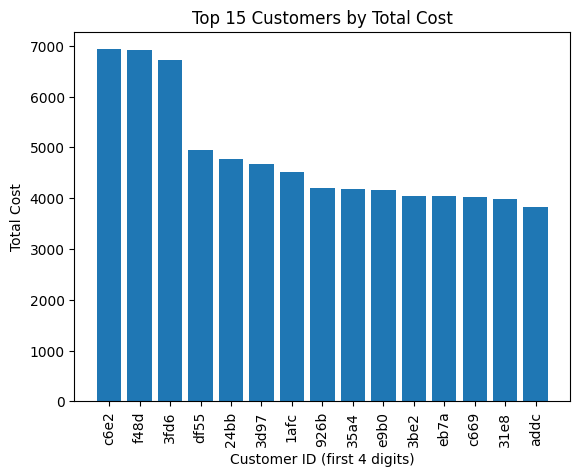

In [137]:
order_items = dataframes['olist_order_items_dataset.csv']
orders = dataframes['olist_orders_dataset.csv']  # Needed for linking 'order_id' to 'customer_id'
customers = dataframes['olist_customers_dataset.csv']

# Ensure 'price' and 'freight_value' are numeric
order_items['price'] = order_items['price'].astype(float)
order_items['freight_value'] = order_items['freight_value'].astype(float)

# Calculate total cost
order_items['total_cost'] = order_items['price'] + order_items['freight_value']

# Sort by 'total_cost' in descending order
n_sorted = order_items.sort_values(by=['total_cost'], ascending=False)

# Merge 'order_items' with 'orders' to get 'customer_id'
merged_orders = pd.merge(n_sorted, orders[['order_id', 'customer_id']], on="order_id", how="left")

# Merge with 'customers' dataset to add 'customer_id' details
final_data = pd.merge(merged_orders, customers, on="customer_id", how="left")


plt.bar(final_data['customer_id'].head(15), final_data['total_cost'].head(15))
plt.xlabel('Customer ID (first 4 digits)')
plt.ylabel('Total Cost of orders')
plt.title('Top 15 Customers by Total Cost')
plt.xticks(plt.xticks()[0], [str(tick)[:4] for tick in final_data['customer_id'].head(15)], rotation=90)

plt.show()

In [132]:
order_items = dataframes['olist_order_items_dataset.csv']

# Merge the order items with the top 15 order IDs
merged_df = pd.merge(top_15_order_ids, order_items, left_index=True, right_on='order_id', how='left')

# Display the 'price' column corresponding to the top 15 order IDs
print(merged_df[['order_id', 'price']])


                                order_id   price
110202  fa65dad1b0e818e3ccc5cb0e39231352  392.55
90242   ccf804e764ed5650cd8759557269dc13   49.99
17607   285c2e15bebd4ac83635ccc563dc71f4   29.00
60265   895ab968e7bb0d5659d16cd74cd1650c   12.99
60266   895ab968e7bb0d5659d16cd74cd1650c   12.99
60267   895ab968e7bb0d5659d16cd74cd1650c   83.80
112173  fedcd9f7ccdc8cba3a18defedd1a5547   79.99
112174  fedcd9f7ccdc8cba3a18defedd1a5547   79.99
105031  ee9ca989fc93ba09a6eddc250ce01742   69.90
33545   4bfcba9e084f46c8e3cb49b0fa6e6159  723.74
14638   21577126c19bf11a0b91592e5844ba78   57.00
26526   3c58bffb70dcf45f12bdf66a3c215905   86.90
31089   4689b1816de42507a7d63a4617383c59  429.99
35200   4fb76fa13b108a0d0478483421b0992c   89.90
91215   cf101c3abd3c061ca9f78c1bbb1125af   85.99
50975   73df5d6adbeea12c8ae03df93f346e86  169.00
87331   c6492b842ac190db807c15aff21a7dd6  189.90
87332   c6492b842ac190db807c15aff21a7dd6  189.90
45733   67d83bd36ec2c7fb557742fb58837659   45.20
